# NLP

## import LIB

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


import nltk
import nltk



## Preprocessing

In [2]:
df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'][8]

"Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too"

In [5]:
df = df.head(500)

In [6]:
df.shape

(500, 10)

Text(0.5, 1.0, 'Count of Star reviews')

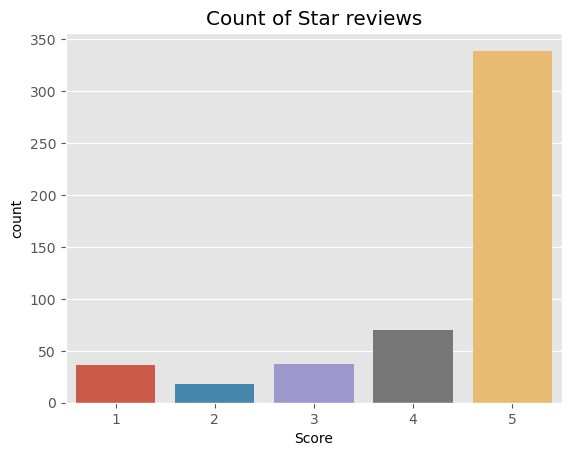

In [56]:
plt.figure()
sb.countplot(df,x='Score')
plt.title('Count of Star reviews')

In [8]:
example = df['Text'][8]

In [9]:
example

"Right now I'm mostly just sprouting this so my cats can eat the grass. They love it. I rotate it around with Wheatgrass and Rye too"

In [10]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords

In [14]:
Stopwords=stopwords.words('english')


In [53]:
#tokenizing the sentence text into tokens below..
token=nltk.word_tokenize(example)
token

['Right',
 'now',
 'I',
 "'m",
 'mostly',
 'just',
 'sprouting',
 'this',
 'so',
 'my',
 'cats',
 'can',
 'eat',
 'the',
 'grass',
 '.',
 'They',
 'love',
 'it',
 '.',
 'I',
 'rotate',
 'it',
 'around',
 'with',
 'Wheatgrass',
 'and',
 'Rye',
 'too']

### Parts of Speech TAG(pos_tag())

In [16]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
tags=nltk.pos_tag(token)
tags[:5
    ]

[('Right', 'RB'), ('now', 'RB'), ('I', 'PRP'), ("'m", 'VBP'), ('mostly', 'RB')]

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [19]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vishnu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
sentimen_IA = SentimentIntensityAnalyzer()

In [54]:
#loop bar
from tqdm.notebook import tqdm

In [50]:
result={}

In [51]:
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    result[myid] = sentimen_IA.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [25]:
vaders = pd.DataFrame(result).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [ ]:
vaders = vaders.merge(df, how='left')

In [ ]:
df

## Analyzing score vs Aggregate(compound)

Text(0.5, 1.0, 'Compund Score by Amazon Star Review')

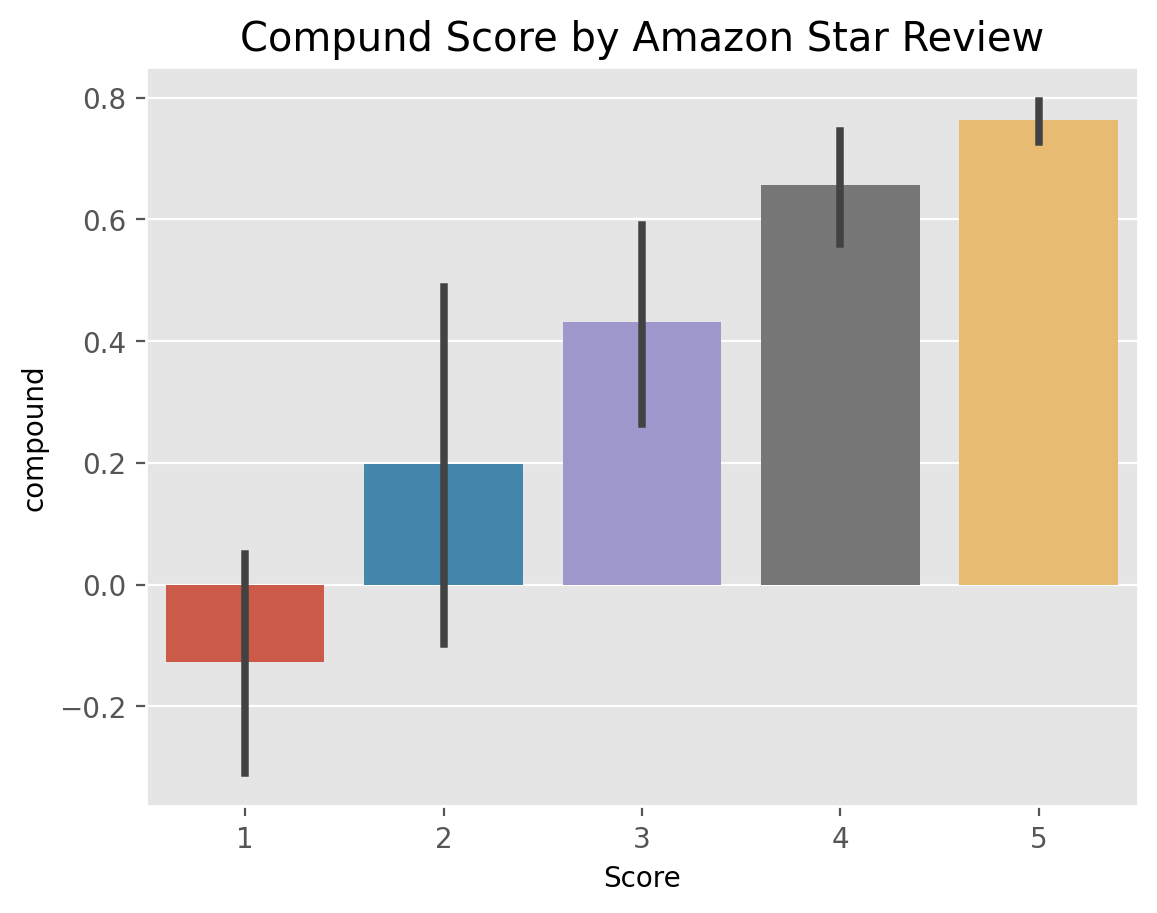

In [57]:
plt.figure(dpi=200)
ax = sb.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')


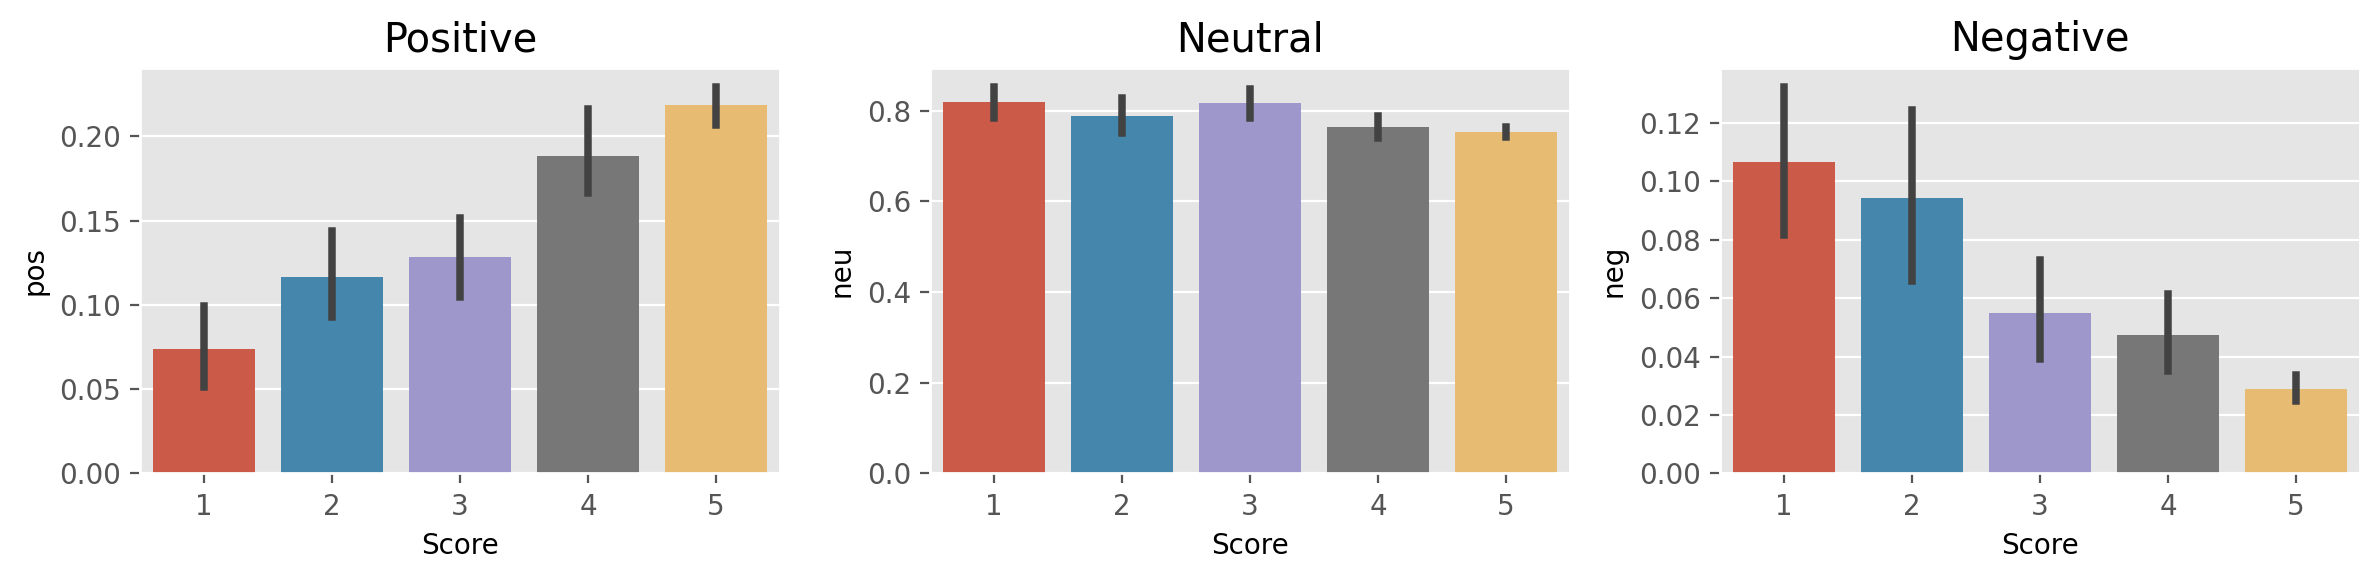

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3),dpi=200)
sb.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sb.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sb.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

